--------------- Projet de Régression Logistique : Prédiction de l'Attrition des Employés ----------------

------> Par ZIAN Hafsa



1. Exploration des Données (AED)

    Age : Âge de l'employé.

    Attrition : Indicateur de l'attrition (Yes/No).

    BusinessTravel : Fréquence des déplacements professionnels.

    DailyRate : Tarif quotidien.

    Department : Département de l'employé.

    DistanceFromHome : Distance entre le domicile et le travail.

    Education : Niveau d'éducation.

    EducationField : Domaine d'études.

    EmployeeCount : Nombre d'employés.

    EmployeeNumber : Numéro d'identification de l'employé.

    EnvironmentSatisfaction : Satisfaction de l'environnement de travail.

    Gender : Sexe de l'employé.

    HourlyRate : Taux horaire.

    JobInvolvement : Niveau d'implication au travail.

    JobLevel : Niveau du poste.

    JobRole : Rôle de l'employé.

    JobSatisfaction : Satisfaction professionnelle.

    MaritalStatus : Statut marital.

    MonthlyIncome : Revenu mensuel.

    MonthlyRate : Taux mensuel.

    NumCompaniesWorked : Nombre d'entreprises dans lesquelles l'employé a travaillé.

    Over18 : Si l'employé a plus de 18 ans.

    OverTime : Si l'employé travaille des heures supplémentaires.

    PercentSalaryHike : Augmentation de salaire en pourcentage.

    PerformanceRating : Évaluation des performances.

    RelationshipSatisfaction : Satisfaction des relations de travail.

    StandardHours : Nombre d'heures standard de travail.

    StockOptionLevel : Niveau des options d'actions.

    TotalWorkingYears : Nombre total d'années d'expérience professionnelle.

    TrainingTimesLastYear : Nombre de formations l'année dernière.

    WorkLifeBalance : Équilibre travail-vie personnelle.

    YearsAtCompany : Nombre d'années passées dans l'entreprise.

    YearsInCurrentRole : Nombre d'années dans le rôle actuel.

    YearsSinceLastPromotion : Nombre d'années depuis la dernière promotion.
    
    YearsWithCurrManager : Nombre d'années avec le manager actuel.

2. Prétraitement des Données

*** Traitement des valeurs manquantes : 

    Vous devez identifier les colonnes avec des valeurs manquantes et les traiter en les remplissant ou en supprimant les lignes/colonnes affectées. 

***Encodage des variables catégorielles : 

    Certaines colonnes sont catégorielles comme Attrition, Gender, BusinessTravel, etc. Vous pouvez les encoder en utilisant LabelEncoder ou OneHotEncoder de sklearn. 

***Normalisation des données numériques : 

    les colonnes comme DailyRate, Age, MonthlyIncome peuvent être normalisées ou standardisées à l'aide de StandardScaler ou MinMaxScaler de sklearn.


3. Construction des Modèles

Implémenter un modèle de classification basé sur un arbre de décision --> DecisionTreeClassifier de sklearn

Implémenter un modèle de classification basé sur une forêt aléatoire --> RandomForestClassifier de sklearn

Ajustement d'Hyperparamètres --> GridSearchCV ou RandomizedSearchCV

Évaluation des Performances --> Des métriques




In [11]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
df = pd.read_csv('donnees_projet2.csv')

categorical_columns = ['BusinessTravel', 'Department', 'Gender', 'MaritalStatus', 'JobRole', 'OverTime', 'EducationField']  # Ajoutez d'autres colonnes si nécessaire

le = LabelEncoder()

for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

df['Over18'] = df['Over18'].map({'Y': 1, 'N': 0})

print(df[categorical_columns + ['Over18']].head())

X = df.drop(['Attrition', 'EmployeeNumber'], axis=1)  
y = df['Attrition']

numeric_cols = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 
                'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 
                'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 
                'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)
print("Performance de l'Arbre de Décision :")
print(f"Précision : {accuracy_score(y_test, y_pred_dt)}")
print(f"Matrice de confusion :\n{confusion_matrix(y_test, y_pred_dt)}")
print(f"Rapport de classification :\n{classification_report(y_test, y_pred_dt)}")

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
print("\nPerformance de la Forêt Aléatoire :")
print(f"Précision : {accuracy_score(y_test, y_pred_rf)}")
print(f"Matrice de confusion :\n{confusion_matrix(y_test, y_pred_rf)}")
print(f"Rapport de classification :\n{classification_report(y_test, y_pred_rf)}")


if accuracy_score(y_test, y_pred_dt) > accuracy_score(y_test, y_pred_rf):
    print("L'arbre de décision a de meilleures performances.")
else:
    print("La forêt aléatoire a de meilleures performances.")

   BusinessTravel  Department  Gender  MaritalStatus  JobRole  OverTime  \
0               2           2       0              2        7         1   
1               1           1       1              1        6         0   
2               2           1       1              2        2         1   
3               1           1       0              1        6         1   
4               2           1       1              1        2         0   

   EducationField  Over18  
0               1       1  
1               1       1  
2               4       1  
3               1       1  
4               3       1  
Performance de l'Arbre de Décision :
Précision : 0.782312925170068
Matrice de confusion :
[[223  32]
 [ 32   7]]
Rapport de classification :
              precision    recall  f1-score   support

          No       0.87      0.87      0.87       255
         Yes       0.18      0.18      0.18        39

    accuracy                           0.78       294
   macro avg       0.5

---> la Visualisation des Données :

Visualisation de l'attrition par Département :

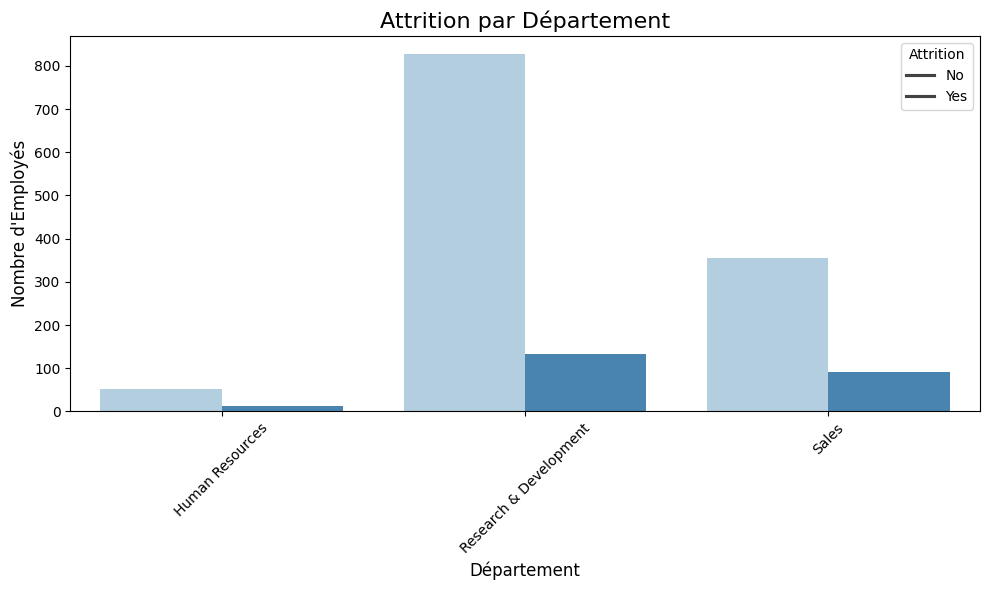

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('donnees_projet2.csv') 

df['Attrition'] = df['Attrition'].map({'No': 0, 'Yes': 1})

attrition_by_dept = df.groupby(['Department', 'Attrition']).size().reset_index(name='Count')

plt.figure(figsize=(10, 6))
sns.barplot(data=attrition_by_dept, x='Department', y='Count', hue='Attrition', palette="Blues")

plt.title("Attrition par Département", fontsize=16)
plt.xlabel("Département", fontsize=12)
plt.ylabel("Nombre d'Employés", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Attrition', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()


Visualisation de l'attrition par Genre :


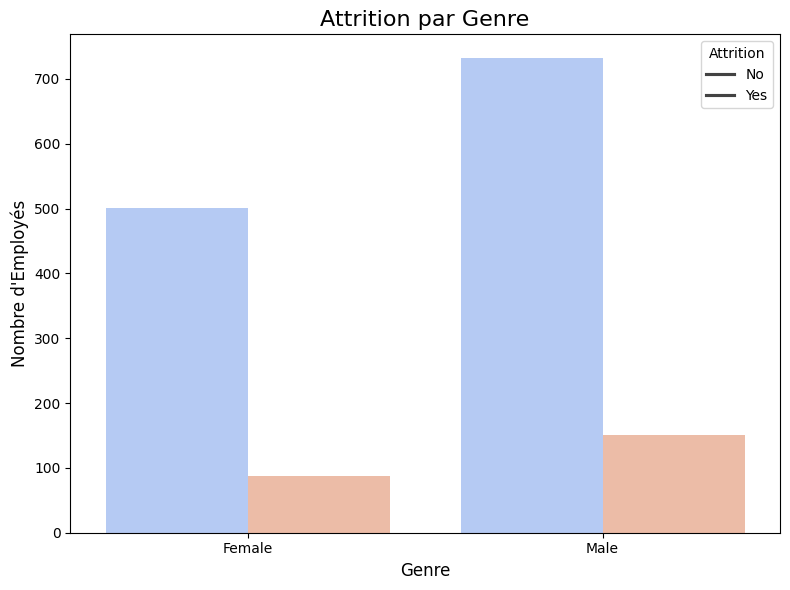

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('donnees_projet2.csv')  

df['Attrition'] = df['Attrition'].map({'No': 0, 'Yes': 1})

attrition_by_gender = df.groupby(['Gender', 'Attrition']).size().reset_index(name='Count')

plt.figure(figsize=(8, 6))
sns.barplot(data=attrition_by_gender, x='Gender', y='Count', hue='Attrition', palette="coolwarm")

plt.title("Attrition par Genre", fontsize=16)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Nombre d'Employés", fontsize=12)
plt.legend(title='Attrition', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()


Visualisation de l'attrition par Tranche de Salaire :

C:\Users\l\AppData\Local\Temp\ipykernel_12652\112439855.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attrition_by_salary = df.groupby(['SalaryRange', 'Attrition']).size().reset_index(name='Count')


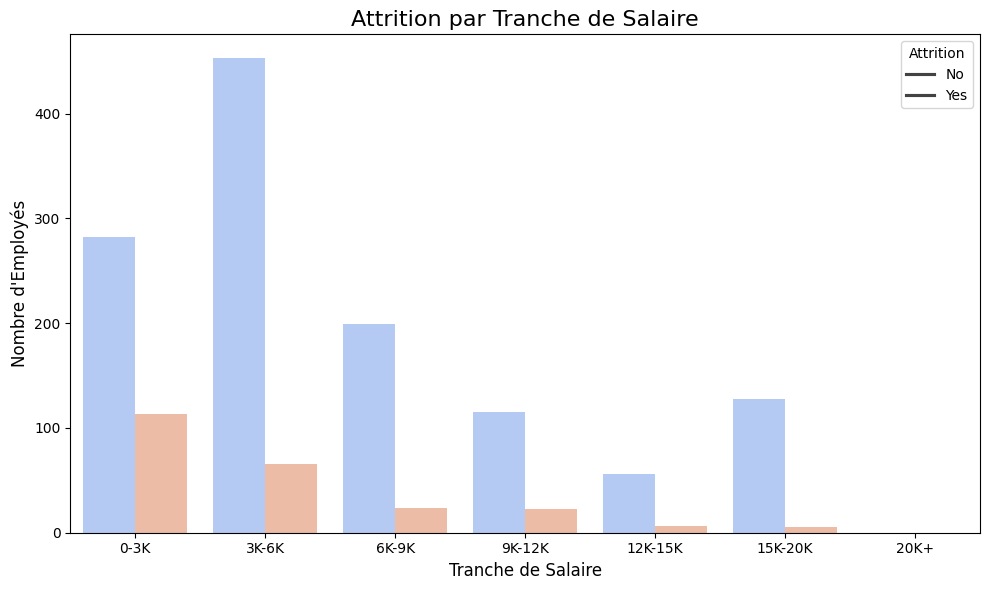

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('donnees_projet2.csv') 

df['Attrition'] = df['Attrition'].map({'No': 0, 'Yes': 1})

bins = [0, 3000, 6000, 9000, 12000, 15000, 20000, 25000] 
labels = ['0-3K', '3K-6K', '6K-9K', '9K-12K', '12K-15K', '15K-20K', '20K+']
df['SalaryRange'] = pd.cut(df['MonthlyIncome'], bins=bins, labels=labels, right=False)

attrition_by_salary = df.groupby(['SalaryRange', 'Attrition']).size().reset_index(name='Count')


plt.figure(figsize=(10, 6))
sns.barplot(data=attrition_by_salary, x='SalaryRange', y='Count', hue='Attrition', palette="coolwarm")

plt.title("Attrition par Tranche de Salaire", fontsize=16)
plt.xlabel("Tranche de Salaire", fontsize=12)
plt.ylabel("Nombre d'Employés", fontsize=12)
plt.legend(title='Attrition', labels=['No', 'Yes'])


plt.tight_layout()
plt.show()


Visualisation de l'attrition par Pourcentage d'Augmentation de Salaire :

C:\Users\l\AppData\Local\Temp\ipykernel_12652\3198289851.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attrition_by_salary_hike = df.groupby(['SalaryHikeRange', 'Attrition']).size().reset_index(name='Count')


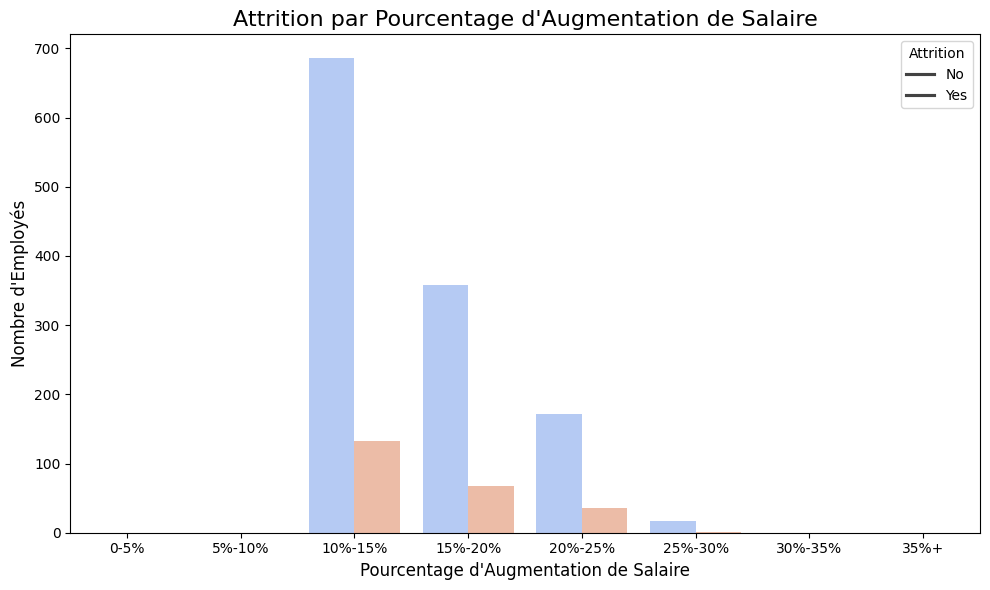

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('donnees_projet2.csv')

df['Attrition'] = df['Attrition'].map({'No': 0, 'Yes': 1})

bins = [0, 5, 10, 15, 20, 25, 30, 35, 40] 
labels = ['0-5%', '5%-10%', '10%-15%', '15%-20%', '20%-25%', '25%-30%', '30%-35%', '35%+']
df['SalaryHikeRange'] = pd.cut(df['PercentSalaryHike'], bins=bins, labels=labels, right=False)

attrition_by_salary_hike = df.groupby(['SalaryHikeRange', 'Attrition']).size().reset_index(name='Count')


plt.figure(figsize=(10, 6))
sns.barplot(data=attrition_by_salary_hike, x='SalaryHikeRange', y='Count', hue='Attrition', palette="coolwarm")

plt.title("Attrition par Pourcentage d'Augmentation de Salaire", fontsize=16)
plt.xlabel("Pourcentage d'Augmentation de Salaire", fontsize=12)
plt.ylabel("Nombre d'Employés", fontsize=12)
plt.legend(title='Attrition', labels=['No', 'Yes'])


plt.tight_layout()
plt.show()


Visualisation de l'attrition par Rôle de l'Emploi :

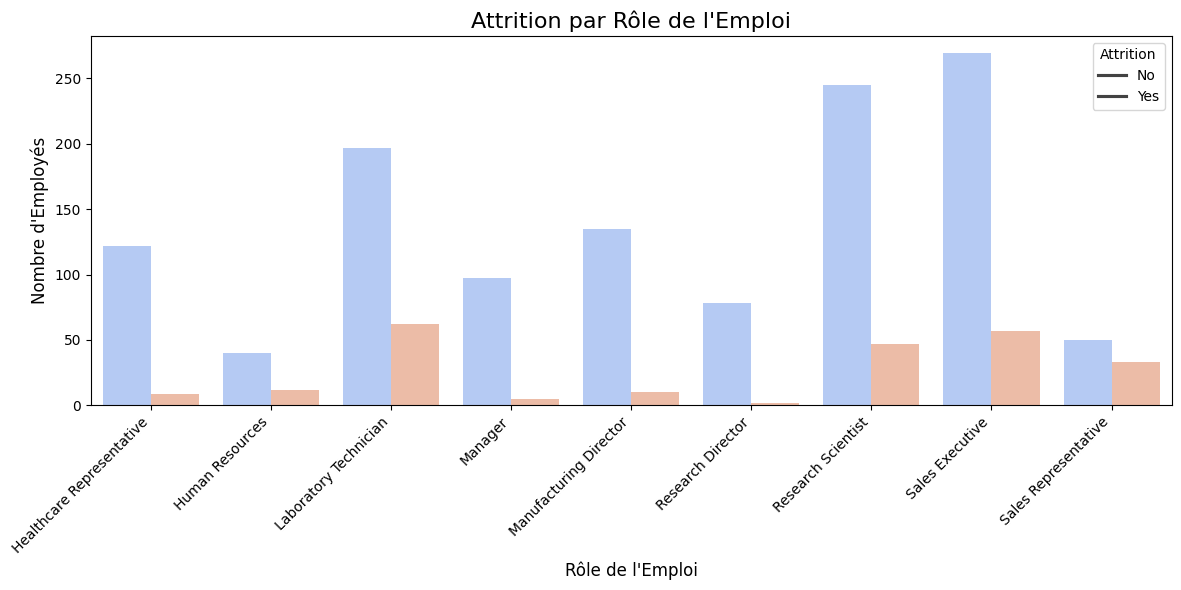

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('donnees_projet2.csv')  

df['Attrition'] = df['Attrition'].map({'No': 0, 'Yes': 1})

attrition_by_job_role = df.groupby(['JobRole', 'Attrition']).size().reset_index(name='Count')

plt.figure(figsize=(12, 6))
sns.barplot(data=attrition_by_job_role, x='JobRole', y='Count', hue='Attrition', palette="coolwarm")

plt.title("Attrition par Rôle de l'Emploi", fontsize=16)
plt.xlabel("Rôle de l'Emploi", fontsize=12)
plt.ylabel("Nombre d'Employés", fontsize=12)
plt.xticks(rotation=45, ha="right")  
plt.legend(title='Attrition', labels=['No', 'Yes'])


plt.tight_layout()
plt.show()


Visualisation de l'attrition par Satisfaction au Travail :


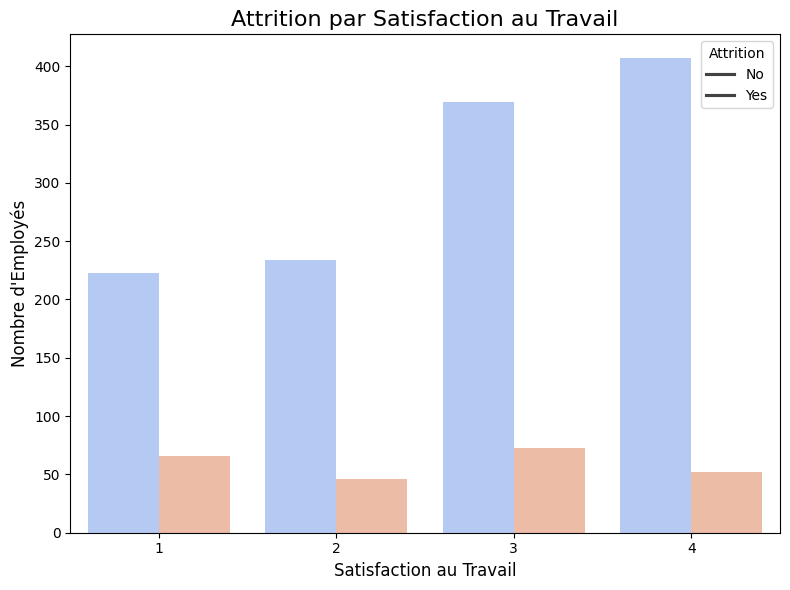

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('donnees_projet2.csv') 

df['Attrition'] = df['Attrition'].map({'No': 0, 'Yes': 1})

attrition_by_job_satisfaction = df.groupby(['JobSatisfaction', 'Attrition']).size().reset_index(name='Count')

plt.figure(figsize=(8, 6))
sns.barplot(data=attrition_by_job_satisfaction, x='JobSatisfaction', y='Count', hue='Attrition', palette="coolwarm")

plt.title("Attrition par Satisfaction au Travail", fontsize=16)
plt.xlabel("Satisfaction au Travail", fontsize=12)
plt.ylabel("Nombre d'Employés", fontsize=12)
plt.xticks(rotation=0)  
plt.legend(title='Attrition', labels=['No', 'Yes'])


plt.tight_layout()
plt.show()


Visualisation de l'attrition par Satisfaction de l'Environnement :

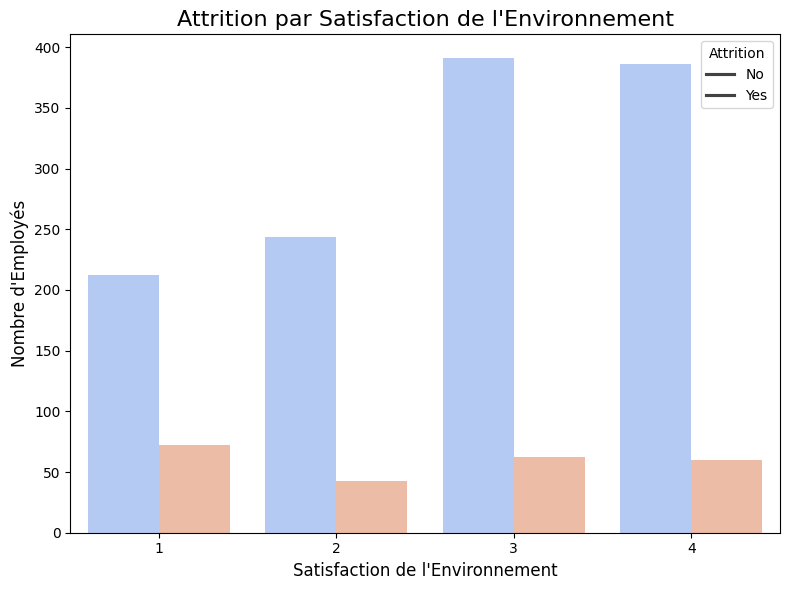

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('donnees_projet2.csv') 

df['Attrition'] = df['Attrition'].map({'No': 0, 'Yes': 1})

attrition_by_environment_satisfaction = df.groupby(['EnvironmentSatisfaction', 'Attrition']).size().reset_index(name='Count')

plt.figure(figsize=(8, 6))
sns.barplot(data=attrition_by_environment_satisfaction, x='EnvironmentSatisfaction', y='Count', hue='Attrition', palette="coolwarm")

plt.title("Attrition par Satisfaction de l'Environnement", fontsize=16)
plt.xlabel("Satisfaction de l'Environnement", fontsize=12)
plt.ylabel("Nombre d'Employés", fontsize=12)
plt.xticks(rotation=0)  
plt.legend(title='Attrition', labels=['No', 'Yes'])


plt.tight_layout()
plt.show()


Visualisation de l'attrition par Fréquence de Voyage d'Affaires :



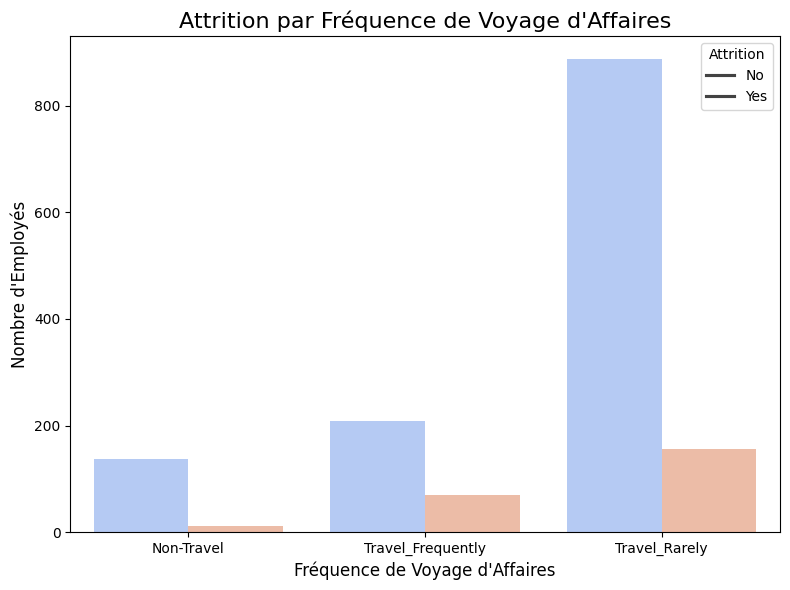

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('donnees_projet2.csv')  

df['Attrition'] = df['Attrition'].map({'No': 0, 'Yes': 1})

attrition_by_business_travel = df.groupby(['BusinessTravel', 'Attrition']).size().reset_index(name='Count')

plt.figure(figsize=(8, 6))
sns.barplot(data=attrition_by_business_travel, x='BusinessTravel', y='Count', hue='Attrition', palette="coolwarm")

plt.title("Attrition par Fréquence de Voyage d'Affaires", fontsize=16)
plt.xlabel("Fréquence de Voyage d'Affaires", fontsize=12)
plt.ylabel("Nombre d'Employés", fontsize=12)
plt.xticks(rotation=0)  
plt.legend(title='Attrition', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()


Visualisation de l'attrition par Équilibre Vie-Travail :

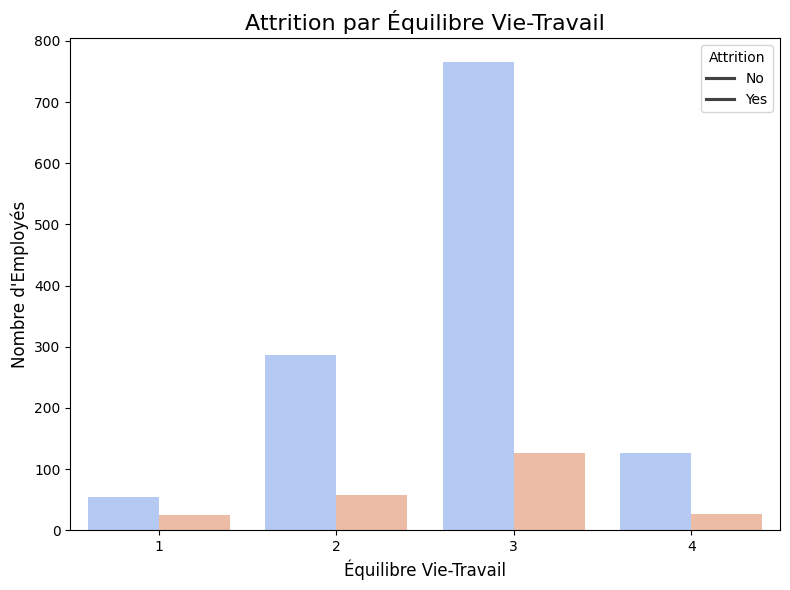

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('donnees_projet2.csv')  

df['Attrition'] = df['Attrition'].map({'No': 0, 'Yes': 1})

attrition_by_work_life_balance = df.groupby(['WorkLifeBalance', 'Attrition']).size().reset_index(name='Count')

plt.figure(figsize=(8, 6))
sns.barplot(data=attrition_by_work_life_balance, x='WorkLifeBalance', y='Count', hue='Attrition', palette="coolwarm")

plt.title("Attrition par Équilibre Vie-Travail", fontsize=16)
plt.xlabel("Équilibre Vie-Travail", fontsize=12)
plt.ylabel("Nombre d'Employés", fontsize=12)
plt.xticks(rotation=0)  
plt.legend(title='Attrition', labels=['No', 'Yes'])


plt.tight_layout()
plt.show()


Visualisation de l'attrition par Distance du Domicile :


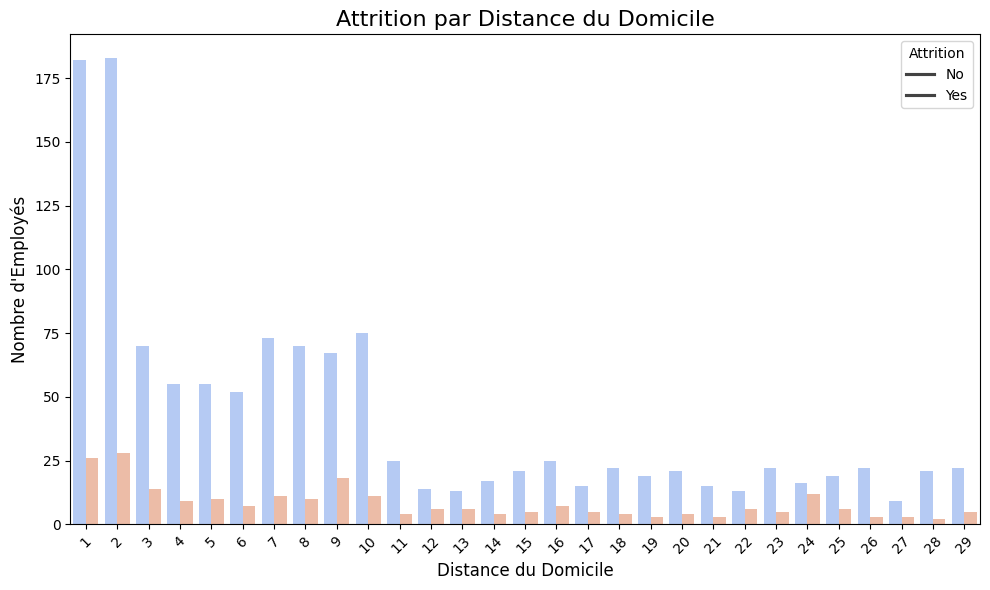

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('donnees_projet2.csv')  

df['Attrition'] = df['Attrition'].map({'No': 0, 'Yes': 1})
attrition_by_distance = df.groupby(['DistanceFromHome', 'Attrition']).size().reset_index(name='Count')

plt.figure(figsize=(10, 6))
sns.barplot(data=attrition_by_distance, x='DistanceFromHome', y='Count', hue='Attrition', palette="coolwarm")

plt.title("Attrition par Distance du Domicile", fontsize=16)
plt.xlabel("Distance du Domicile", fontsize=12)
plt.ylabel("Nombre d'Employés", fontsize=12)
plt.xticks(rotation=45) 
plt.legend(title='Attrition', labels=['No', 'Yes'])


plt.tight_layout()
plt.show()


Séparation des données : 

La séparation des données en ensembles d'entraînement et de test est une étape essentielle dans la construction de modèles de machine learning. Cela permet d'entraîner le modèle sur une partie des données et de l'évaluer sur une autre, afin de vérifier sa capacité à généraliser sur des données inconnues.



In [2]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Attrition'])
y = df['Attrition']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(f"Taille de l'ensemble d'entraînement: {X_train.shape[0]} échantillons")
print(f"Taille de l'ensemble de test: {X_test.shape[0]} échantillons")


Taille de l'ensemble d'entraînement: 1176 échantillons
Taille de l'ensemble de test: 294 échantillons


Visualisation des probabilités prédites d'attrition en fonction de la satisfaction au
travail :

In [8]:
#Encodage des colonnes catégoriques
from sklearn.preprocessing import LabelEncoder

for col in df.select_dtypes(include=['object', 'category']):
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])


Verification :

In [9]:
X = df.drop(columns=['Attrition']) 
y = df['Attrition'] 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Le model :

In [10]:
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression(random_state=42, max_iter=1000)
logreg_model.fit(X_train, y_train)


c:\Users\l\myenvv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

Visualisation:

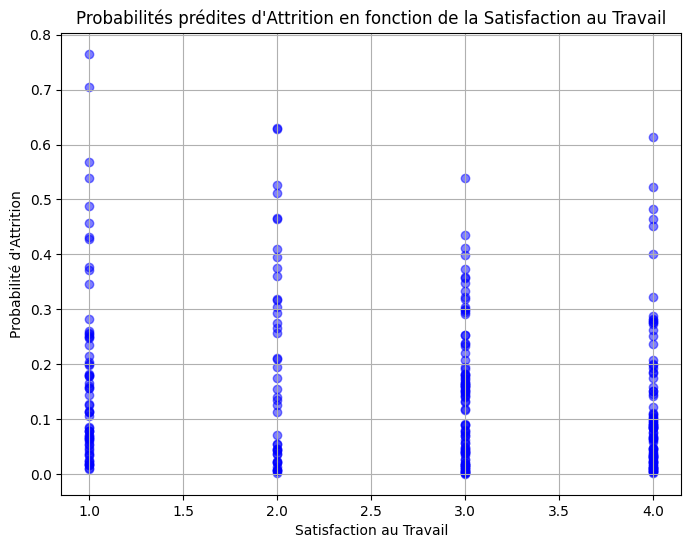

In [11]:
y_pred_prob = logreg_model.predict_proba(X_test)[:, 1]

satisfaction = df['JobSatisfaction'].iloc[X_test.index] 
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(satisfaction, y_pred_prob, alpha=0.5, color='blue')
plt.title("Probabilités prédites d'Attrition en fonction de la Satisfaction au Travail")
plt.xlabel("Satisfaction au Travail")
plt.ylabel("Probabilité d'Attrition")
plt.grid(True)
plt.show()


Précision du modèle : 0.86
Matrice de confusion :
 [[249   6]
 [ 34   5]]
Rapport de classification :
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       255
           1       0.45      0.13      0.20        39

    accuracy                           0.86       294
   macro avg       0.67      0.55      0.56       294
weighted avg       0.82      0.86      0.83       294

AUC-ROC : 0.69


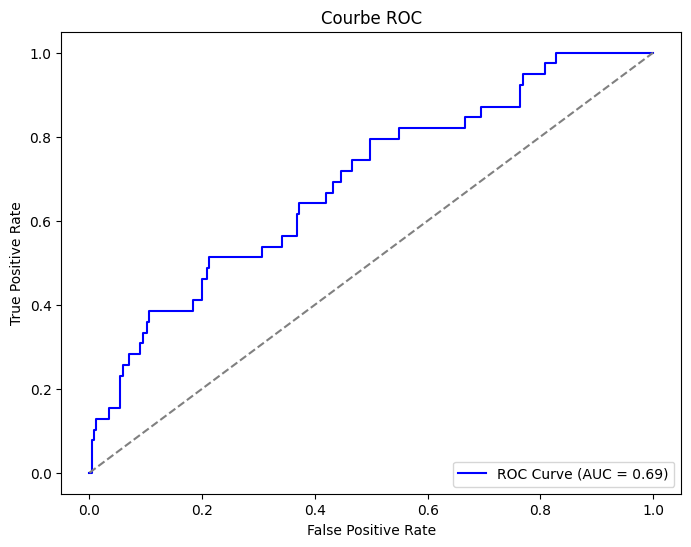

c:\Users\l\myenvv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\l\myenvv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_opt

Scores de validation croisée : [0.83898305 0.84680851 0.81702128 0.84255319 0.83404255]
Précision moyenne (CV) : 0.84


c:\Users\l\myenvv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve,
)
import matplotlib.pyplot as plt

y_pred = logreg_model.predict(X_test)
y_pred_prob = logreg_model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle : {accuracy:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Matrice de confusion :\n", conf_matrix)


classif_report = classification_report(y_test, y_pred)
print("Rapport de classification :\n", classif_report)


roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC-ROC : {roc_auc:.2f}")


fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color="blue")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Courbe ROC")
plt.legend(loc="lower right")
plt.show()

from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(logreg_model, X_train, y_train, cv=5, scoring="accuracy")
print(f"Scores de validation croisée : {cv_scores}")
print(f"Précision moyenne (CV) : {cv_scores.mean():.2f}")


 Une faible sensibilité (ou rappel) signifie que mon modèle a du mal à détecter certains cas d'attrition , ce qui peut indiquer un déséquilibre dans tes classes (beaucoup plus d'employés qui ne quittent pas l'entreprise que ceux qui le font).
